In [1]:
# # Installing required packages
# !pip install pyspark
# !pip install findspark


In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import os
os.environ['PYSPARK_PYTHON'] = 'D:\\Python311\\python.exe'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'D:\\Python311\\python.exe'
os.environ['JAVA_HOME'] = 'D:\\Java\\jdk1.8.0_202\\'

##  Load the data


In [3]:
spark = SparkSession \
    .builder \
    .appName("clustering") \
    .getOrCreate()


In [4]:
sqlContext = SQLContext(spark)

d:\Python311\Lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


## Select input data

In [5]:
# from google.colab import files


# uploaded = files.upload()

In [6]:
file='\\Users\\kimil\\OneDrive\\Desktop\\MUIC_work\\BigData\\BigData\\SparkML\\data\\drybeans.csv'

df = sqlContext.read.load(file,
                          format='com.databricks.spark.csv',
                          header='true',inferSchema='true')

In [7]:
df.count()

13611

In [8]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Area,13611,53048.284549261625,29324.09571688207,20420,254616
Perimeter,13611,855.2834585996654,214.28969589196151,524.736,1985.37
MajorAxisLength,13611,320.1418673032194,85.6941859593335,183.601165,738.8601535
MinorAxisLength,13611,202.2707140828817,44.97009129411471,122.5126535,460.1984968
AspectRation,13611,1.5832419790188144,0.24667845568580432,1.024867596,2.430306447
Eccentricity,13611,0.750894929372346,0.09200176320620888,0.218951263,0.911422968
ConvexArea,13611,53768.20020571596,29774.915817000012,20684,263261
EquivDiameter,13611,253.06421992490445,59.17712014871156,161.2437642,569.3743583
Extent,13611,0.7497327873564055,0.049086366843964224,0.555314717,0.866194641


In [9]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="Class", outputCol="label")
df = indexer.fit(df).transform(df)

In [10]:
ndf = df.drop('Class')
ndf.printSchema()

root
 |-- Area: integer (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- MajorAxisLength: double (nullable = true)
 |-- MinorAxisLength: double (nullable = true)
 |-- AspectRation: double (nullable = true)
 |-- Eccentricity: double (nullable = true)
 |-- ConvexArea: integer (nullable = true)
 |-- EquivDiameter: double (nullable = true)
 |-- Extent: double (nullable = true)
 |-- Solidity: double (nullable = true)
 |-- roundness: double (nullable = true)
 |-- Compactness: double (nullable = true)
 |-- ShapeFactor1: double (nullable = true)
 |-- ShapeFactor2: double (nullable = true)
 |-- ShapeFactor3: double (nullable = true)
 |-- ShapeFactor4: double (nullable = true)
 |-- label: double (nullable = false)



In [11]:
df.printSchema()

root
 |-- Area: integer (nullable = true)
 |-- Perimeter: double (nullable = true)
 |-- MajorAxisLength: double (nullable = true)
 |-- MinorAxisLength: double (nullable = true)
 |-- AspectRation: double (nullable = true)
 |-- Eccentricity: double (nullable = true)
 |-- ConvexArea: integer (nullable = true)
 |-- EquivDiameter: double (nullable = true)
 |-- Extent: double (nullable = true)
 |-- Solidity: double (nullable = true)
 |-- roundness: double (nullable = true)
 |-- Compactness: double (nullable = true)
 |-- ShapeFactor1: double (nullable = true)
 |-- ShapeFactor2: double (nullable = true)
 |-- ShapeFactor3: double (nullable = true)
 |-- ShapeFactor4: double (nullable = true)
 |-- Class: string (nullable = true)
 |-- label: double (nullable = false)



# Prepare the features

In [12]:
from pyspark.ml.feature import VectorAssembler
featuresUsed = ndf.columns

assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features")
assembled = assembler.transform(df)
assembled.show()

+-----+---------+---------------+---------------+------------+------------+----------+-------------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+-----+-----+--------------------+
| Area|Perimeter|MajorAxisLength|MinorAxisLength|AspectRation|Eccentricity|ConvexArea|EquivDiameter|     Extent|   Solidity|  roundness|Compactness|ShapeFactor1|ShapeFactor2|ShapeFactor3|ShapeFactor4|Class|label|            features|
+-----+---------+---------------+---------------+------------+------------+----------+-------------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+-----+-----+--------------------+
|28395|  610.291|    208.1781167|     173.888747| 1.197191424| 0.549812187|     28715|  190.1410973|0.763922518|0.988855999|0.958027126|0.913357755| 0.007331506| 0.003147289| 0.834222388| 0.998723889|SEKER|  2.0|[28395.0,610.291,...|
|28734|  638.018|    200.5247957|    182.7344194| 1.097356461| 0

# Choose number of cluster of Kmean

In [13]:
number_of_clusters = 8

In [14]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = number_of_clusters).setSeed(10)

In [15]:
model = kmeans.fit(assembled)

# Make prediction and show evaluation

In [16]:
predictions = model.transform(assembled)

In [17]:
#predictions.select('prediction').show()
predictions.show()

+-----+---------+---------------+---------------+------------+------------+----------+-------------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+-----+-----+--------------------+----------+
| Area|Perimeter|MajorAxisLength|MinorAxisLength|AspectRation|Eccentricity|ConvexArea|EquivDiameter|     Extent|   Solidity|  roundness|Compactness|ShapeFactor1|ShapeFactor2|ShapeFactor3|ShapeFactor4|Class|label|            features|prediction|
+-----+---------+---------------+---------------+------------+------------+----------+-------------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+-----+-----+--------------------+----------+
|28395|  610.291|    208.1781167|     173.888747| 1.197191424| 0.549812187|     28715|  190.1410973|0.763922518|0.988855999|0.958027126|0.913357755| 0.007331506| 0.003147289| 0.834222388| 0.998723889|SEKER|  2.0|[28395.0,610.291,...|         7|
|28734|  638.018|   

In [18]:
predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  248|
|         6|  175|
|         3|   98|
|         5| 1894|
|         4| 1028|
|         7| 3426|
|         2| 4293|
|         0| 2449|
+----------+-----+



In [19]:
predictions.select("Class","label","prediction").write.save(path="beans_predictions",
                                                     format="com.databricks.spark.csv",
                                                     header='true',
                                                     mode = 'overwrite')

In [20]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()
err = evaluator.evaluate(predictions)
print(err)

In [21]:
print(err)

0.6927163219142628


In [22]:
centers = model.clusterCenters()

In [23]:
print(centers)

[array([5.31520606e+04, 8.98887719e+02, 3.50760143e+02, 1.95082571e+02,
       1.81614123e+00, 8.18005809e-01, 5.38964574e+04, 2.59969640e+02,
       7.24856377e-01, 9.86275194e-01, 8.28843268e-01, 7.46184271e-01,
       6.60705608e-03, 1.28382039e-03, 5.60268366e-01, 9.93559352e-01,
       2.58312858e+00]), array([1.76634323e+05, 1.60587315e+03, 6.04221895e+02, 3.75681374e+02,
       1.61168851e+00, 7.79863455e-01, 1.79025339e+05, 4.74101932e+02,
       7.77210424e-01, 9.86665893e-01, 8.60854796e-01, 7.85726177e-01,
       3.42378535e-03, 8.07364919e-04, 6.18148153e-01, 9.91405902e-01,
       6.00000000e+00]), array([4.16001304e+04, 7.61758725e+02, 2.80094278e+02, 1.90494581e+02,
       1.48299837e+00, 7.12221709e-01, 4.20746505e+04, 2.29985412e+02,
       7.54530961e-01, 9.88759720e-01, 9.02159029e-01, 8.26117487e-01,
       6.74009282e-03, 1.96222556e-03, 6.85954554e-01, 9.96460300e-01,
       1.32163607e+00]), array([2.09245071e+05, 1.75363204e+03, 6.63185079e+02, 4.05820597e+02,
 

In [24]:
elbowset = assembled.select("features")
elbowset.persist()

DataFrame[features: vector]

# Data validation to find the best K

In [25]:
import numpy as np
# Evaluate clustering by computing Silhouette score

err = np.zeros(30)
for k in range(2,31):
    kmeans = KMeans()\
            .setK(k)\
            .setSeed(1)

    model = kmeans.fit(elbowset)
    prediction=model.transform(elbowset)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(prediction)
    err[k-1] = silhouette

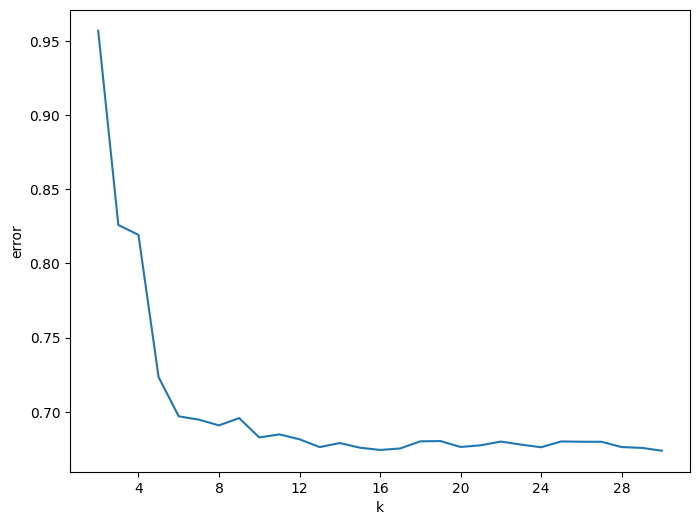

In [26]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,31),err[1:30])
ax.set_xlabel('k')
ax.set_ylabel('error')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#Scale the input data with 0 mean unit(1) variance

In [27]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="features_std", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled)
scaledData = scalerModel.transform(assembled)

In [28]:
kmean = KMeans(k = number_of_clusters,featuresCol="features_std").setSeed(10)

In [29]:
model_std = kmean.fit(scaledData)

In [30]:
prediction_std = model_std.transform(scaledData)


In [31]:
prediction_std.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1| 1870|
|         6| 1083|
|         3| 1556|
|         5| 2731|
|         4| 2807|
|         7| 2073|
|         2|  521|
|         0|  970|
+----------+-----+



In [32]:
evaluator = ClusteringEvaluator()
err = evaluator.evaluate(prediction_std)
print(err)

0.09604404056021124


## Perform elbow plot in the range of 2 - 31

In [33]:
elbowset = scaledData.select("features_std")
elbowset.persist()

DataFrame[features_std: vector]

In [34]:
# Evaluate clustering by computing Silhouette score
err = np.zeros(30)
for k in range(2,31):
    kmeans = KMeans(featuresCol="features_std")\
            .setK(k)\
            .setSeed(1)

    model = kmeans.fit(elbowset)
    prediction=model.transform(elbowset)
    evaluator = ClusteringEvaluator(featuresCol="features_std")
    silhouette = evaluator.evaluate(prediction)
    err[k-1] = silhouette

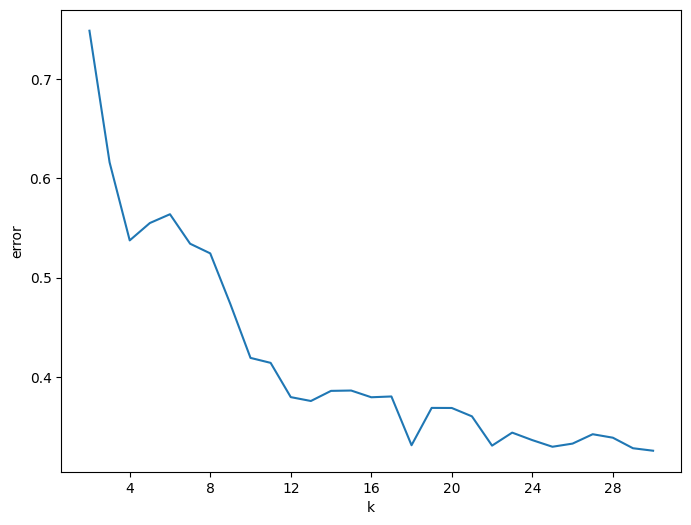

In [35]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,31),err[1:30])
ax.set_xlabel('k')
ax.set_ylabel('error')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

## Use K-mean with selected K

In [36]:
kmeans = KMeans(featuresCol="features_std",k=16, seed=1)
model = kmeans.fit(scaledData)
transformed = model.transform(scaledData)

In [37]:
centers = model.clusterCenters()
centers

[array([-0.24665492, -0.21127867, -0.15880176, -0.25283102,  0.09836683,
         0.32094679, -0.24833283, -0.19936212, -0.83354618,  0.17099667,
         0.04607479, -0.19617965,  0.13628342, -0.19670489, -0.22821236,
         0.0888556 , -0.59131858]),
 array([ 1.79423770e-01,  5.00844477e-01,  6.34554507e-01,  5.91032377e-04,
         1.11647630e+00,  9.53804448e-01,  2.20869269e-01,  3.08853059e-01,
        -8.12621394e-01, -4.48023546e+00, -1.47156004e+00, -1.20410318e+00,
        -2.74435565e-02, -9.98716709e-01, -1.17431129e+00, -4.96107391e+00,
         5.74681632e-01]),
 array([ 0.56933877,  0.90655769,  0.53812288,  0.89541847, -0.28059223,
        -0.06823208,  0.57892708,  0.74650791, -0.02494558, -1.05397553,
        -1.32737404,  0.20802138, -1.11597066, -0.47698107,  0.17971844,
         0.2085621 ,  1.5714572 ]),
 array([-0.52894405, -0.71214757, -0.96494917, -0.02704505, -1.62710985,
        -2.42238433, -0.53285635, -0.5873369 ,  0.53816756,  0.68795242,
         1.34

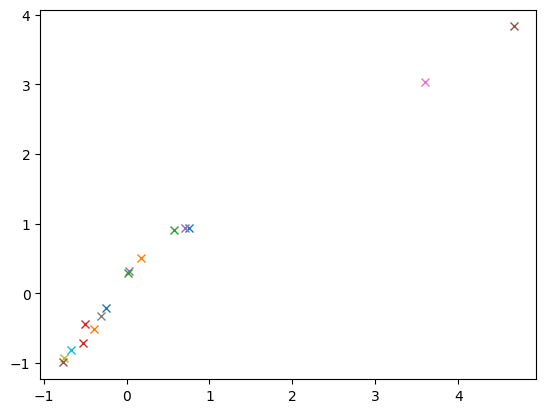

In [38]:
for k in range(0,16):
    plt.plot(centers[k][0],centers[k][1],'x')


In [40]:
spark.stop()